<center>
    <h1>
        <font color="blue">Métodos Númericos</font>
    </h1>
    <h3>
        Trabalho 2 - Resolução de Sistemas Lineares e Não-Lineares
    </h3>
    <h3>
        <div style="text-align: right;">
            Carlos Eduardo Cassimiro (402714)
        </div>
    </h3>
    <h2>
        Relatório
    </h2>
</center>

==============================================================================================================

#### Sumário:
1. Métodos
2. Execução dos Testes <br>
2.1 Matrizes <br>
2.2 Testes Método da Eliminação de Gauss <br>
2.3 Testes Método de Gauss-Jacobi <br>
2.4 Testes Método de Gauss-Seidel <br>
2.5 Estimativa dos Erros <br>
3. Comparações os Métodos  <br>
3.1 Comparação para matriz 1 <br>
3.2 Comparação para matriz 2 <br>
4. Conclusão

==============================================================================================================

## 1. Métodos

In [1]:
# Módulos utilizados
import datetime                       # Datetime para utilizar as funções de tempo para regristro desempenho.
import pandas                         # Pandas para organizar e exportor os resultados de forma mais legível.
import matplotlib.pyplot as mtplot    # Matplotlib.pyplot para exibir o desempenho visualmete de tempo dos métodos.
import copy                           # Copy para copiar os valores dos vetores sem o endereço de refeência.

#### Método da Eliminação de Gauss

In [2]:
def eliminacao_gauss(a, b):
    n = len(b)
        
    for k in range(0,n):
        for i in range (k+1,n):
            m = a[i][k]/a[k][k]
            a[i][k] = 0
            for j in range(k+1,n):
                a[i][j] = a[i][j] - m*a[k][j]
            b[i] = b[i] - m*b[k]
            
    x = n*[0]
    x[n-1] = b[n-1]/a[n-1][n-1]
    for i in range(n-1,-1,-1):
        soma = 0
        for j in range(i+1,n,+1):
            soma += a[i][j]*x[j]
        x[i] = (b[i]-soma)/a[i][i]
    return x

O método da eliminação de Gauss, também conhecido como método de escalonamento, é uma ferramenta matemática para encontrarmos a solução de um sistema de equações lineares de forma analítica. Embora o método consista em sua solução analítica, podemos implementar o seu algoritmo em uma rotina programa sem necessariamente utilizar computação simbólica, tornando-se sua implementação relativamente mais prática. <br>
Este método consiste em aplicar sucessivas operações elementares em um sistema linear, para o transformar em um sistema de mais fácil resolução, que apresenta exatamente as mesmas soluções que o original. <br>
Para uma análise axintótica, podemos ver que a sua complexidade consiste em $O(n^3+n^2)$.

#### Método de Gauss-Jacobi

In [3]:
def jacobi(A,B,itr):
    a = copy.deepcopy(A)
    b = copy.deepcopy(B)
    
    n = len(a)
    
    vmax = []
    
    for i in range(0, n):
        vmax.append(a[i][i])
        a[i] = [ -1*k/vmax[i] for k in a[i] ]
        a[i][i] = b[i]/vmax[i]
        
    for i in range(0, n):
        b[i] = a[i][i]
    
    for m in range(0,itr):
        soma = n*[0]
        for j in range(0,n):
            for i in range(0,n):
                if i!=j :
                    soma[j] += b[i] * a[j][i]
                else:
                    soma[j] += a[j][i]
        b = soma
    return b

O método de Gauss-Jacobi é um método iterativo de resolução de sistemas linerares. Trata-se de um método númerico aproxima a solução do referido sistema com sucessivas iterações. <br> 
O seu algoritmo consiste em isolar as suas icógnitas, calcular a solução do sistema com uma entrada de 0 nas icógnitas. Em seguida, novamente se calcula a solução do sistema, mas as entradas são as respostas obtidas primeira iteração. <br> 
Repete-se n vezes até encontrar a solução do sistema ou uma aproximação satisfatória.
Para uma análise axintótica, podemos ver que a sua complexidade consiste em $O(n^3+n)$.

#### Método de Gauss-Seidel

In [4]:
def seidel(A,B,itr):
    a = copy.deepcopy(A)
    b = copy.deepcopy(B)
    
    n = len(a)
    
    vmax = []
    for i in range(0, n):
        vmax.append(a[i][i])
        a[i] = [ -1*k/vmax[i] for k in a[i] ]
        a[i][i] = b[i]/vmax[i]

    b = n*[0]
    for m in range(0,itr):
        soma = n*[0]
        for j in range(0,n):
            for i in range(0,n):
                if i!=j :
                    soma[j] += b[i] * a[j][i]
                else:
                    soma[j] += a[j][i]
            b[j] = soma[j]
    return b

O método de Gauss-Seidel é um método numérico iterativo análogo ao método de Gauss-Jacobi para a solução de sistemas lineares, entretanto realiza aproximações de forma mais rápida comparado ao seu antecessor. <br>
A diferença entre o método de Seidel e Jacobi consiste na atualização imediata dos valores das soluções encontrados durante as iterações, dessa maneira o método converge para a solução mais rapidamente. <br>
Para uma análise axintótica, podemos ver que a sua complexidade consiste em $O(n^3+n)$.

## 2. Execução dos Testes

### 2.1 Matrizes

$$1) \begin{bmatrix} 10 & 2 & 1 \\ 1 & 5 & 1 \\ 2 & 3 & 10 \end{bmatrix}*x =  \begin{bmatrix} 7 \\ -8 \\ 6 \end{bmatrix}$$

$$2) \begin{bmatrix} 9 & -2 & 1 & 2 \\ 2 & 8 & -2 & 3 \\ -3 & 2 & 11 & -4 \\ -2 & 3 & 2 & 10 \end{bmatrix}*x =  \begin{bmatrix} 54.5 \\ -14 \\ 12.5 \\ -21 \end{bmatrix}$$

In [5]:
# Matris 1
mtrs1_a = [[10,2,1],[1,5,1],[2,3,10]]
mtrs1_b = [7,-8,6]

# Matris 2
mtrs2_a = [[9,-2,1,2],[2,8,-2,3],[-3,2,11,-4],[-2,3,2,10]]
mtrs2_b = [54.5,-14,12.5,-21]

### 2.2 Testes Método Eliminação de Gauss

In [6]:
inicio = datetime.datetime.now() 
resp1_m1 = (eliminacao_gauss(mtrs1_a,mtrs1_b))
fim = datetime.datetime.now()
tempo1_m1= ((fim - inicio).total_seconds())

inicio = datetime.datetime.now()
resp2_m1 = (eliminacao_gauss(mtrs2_a,mtrs2_b))
fim = datetime.datetime.now()
tempo2_m1 = ((fim - inicio).total_seconds())

### 2.3 Testes Método de Gauss-Jacobi

In [7]:
itr = [1,5,10,15]         # Iterações utilizadas nos testes

resp1_m2 = []             # Vetor para alocar os resultados do método
tempo1_m2 = []            # Vetor para alocar os tempos desenvolvidos pelo algoriitmo
for i in itr:             # Laço para diminui repetições de código
    inicio = datetime.datetime.now()   # Registro do tempo inicial antes da execução do método
    resp1_m2.append(jacobi(mtrs1_a,mtrs1_b,i))  # Aplicação no método na primeira função
    fim = datetime.datetime.now()   # Registro do tempo final da execução
    tempo1_m2.append((fim - inicio).total_seconds())   # Diferente entre o valor de tempo final e inicial em segundos

resp2_m2 = []       # Repetição da estrutura anterior para a segunda função
tempo2_m2 = []
for i in itr:
    inicio = datetime.datetime.now()
    resp2_m2.append(jacobi(mtrs2_a,mtrs2_b,i))
    fim = datetime.datetime.now()
    tempo2_m2.append((fim - inicio).total_seconds())
    

### 2.4 Testes Método de Gauss-Seidel

In [8]:
resp1_m3 = []             # Vetor para alocar os resultados do método
tempo1_m3 = []            # Vetor para alocar os tempos desenvolvidos pelo algoriitmo
for i in itr:             # Laço para diminui repetições de código
    inicio = datetime.datetime.now()   # Registro do tempo inicial antes da execução do método
    resp1_m3.append(seidel(mtrs1_a,mtrs1_b,i))  # Aplicação no método na primeira função
    fim = datetime.datetime.now()   # Registro do tempo final da execução
    tempo1_m3.append((fim - inicio).total_seconds())   # Diferente entre o valor de tempo final e inicial em segundos

resp2_m3 = []       # Repetição da estrutura anterior para a segunda função
tempo2_m3 = []
for i in itr:
    inicio = datetime.datetime.now()
    resp2_m3.append(seidel(mtrs2_a,mtrs2_b,i))
    fim = datetime.datetime.now()
    tempo2_m3.append((fim - inicio).total_seconds())
    

### 2.5 Estimativa dos Erros

In [57]:
# Função para calcular o erro absoluto da solução encontrada para uma matriz
# A função compara os valores encontrados pelo cálculo das equações com
# os valores encontrados para as incógnitas do sistema são inseridos e posteriormente
# suas sokuções são comparadas às soluções do prórpio sistema

def erro_abs_m1(a, b, resp):
    n = len(a)
    v_erro = []
    for j in range(0,n):
        soma = 0
        for i in range(0,n):
            soma+=resp[i]*a[j][i]
        v_erro.append(abs(abs(soma)-abs(b[j])))
    return v_erro

In [10]:
# Estimativas de Erro Absoluto para o método de Gauss
erro_abs1_m1 = erro_abs_m1(mtrs1_a, mtrs1_b,resp1_m1)
erro_abs2_m1 = erro_abs_m1(mtrs2_a, mtrs2_b,resp2_m1)

In [56]:
# Os métodos de Jacobi e Seidel são iterativos, dessa maneira, faz necessário
# a utilização de uma função que possa facilitar as repetidas comparações.
# A seguinte função de deste utiliza a primeira repetidas vezes.

def erro_abs_m2(a, b, resp):
    v_erro = []
    for i in range(0,len(resp)):
        v_erro.append(erro_abs_m1(a, b, resp[i]))
    return v_erro

In [58]:
# Estimativas de Erro Absoluto para o método de Jacobi
erro_abs1_m2 = erro_abs_m2(mtrs1_a, mtrs1_b, resp1_m2)
erro_abs2_m2 = erro_abs_m2(mtrs2_a, mtrs2_b, resp2_m2)

# Estimativas de Erro Absoluto para o método de Seidel
erro_abs1_m3 = erro_abs_m2(mtrs1_a, mtrs1_b, resp1_m3)
erro_abs2_m3 = erro_abs_m2(mtrs2_a, mtrs2_b, resp2_m3)

## 3. Comparações os Métodos
### 3.1 Comparação para a primeira matriz
#### Gráfico dos Tempos

<IPython.core.display.Javascript object>


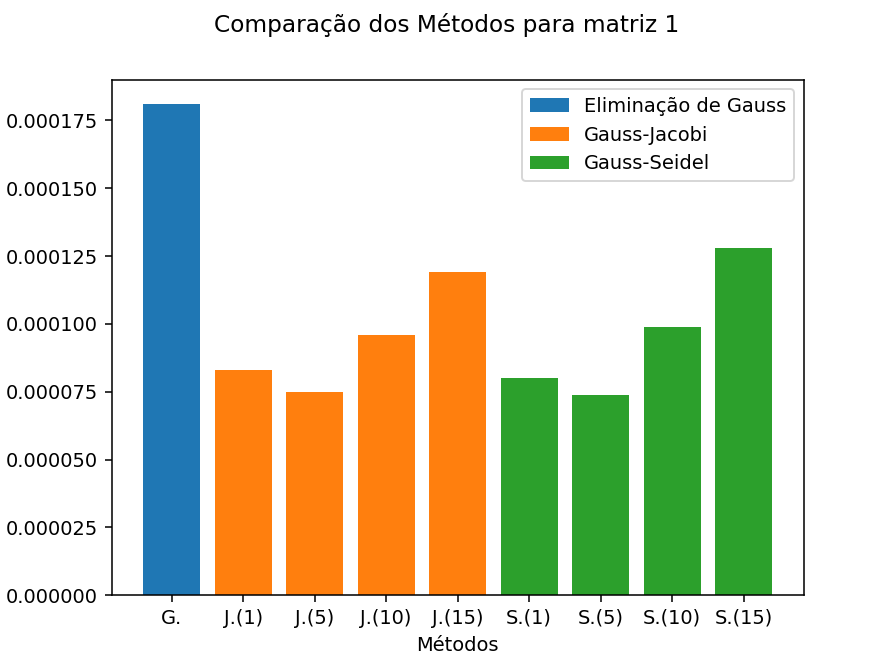

In [13]:
%matplotlib notebook
mtplot.figure(1)
mtplot.suptitle("Comparação dos Métodos para matriz 1")
mtplot.bar(['G.'],tempo1_m1)
mtplot.bar(['J.(1)','J.(5)','J.(10)','J.(15)'],tempo1_m2[0:4])
mtplot.bar(['S.(1)','S.(5)','S.(10)','S.(15)'],tempo1_m3[0:4])
mtplot.ylabel("Tempo(s)")
mtplot.xlabel("Métodos")
mtplot.legend(['Eliminação de Gauss','Gauss-Jacobi','Gauss-Seidel'])
mtplot.show()

#### Resultados das Aproximações

In [14]:
pandas.DataFrame([[resp1_m1,'-','-','-'], resp1_m2, resp1_m3], columns=itr, index=["E.Gauss","Jacobi","Seidel"])

,1,5,10,15
E.Gauss,"[1.0, -2.0, 1.0]",-,-,-
Jacobi,"[0.9625, -2.0, 1.0]","[1.0, -2.0, 1.0]","[1.0, -2.0, 1.0]","[1.0, -2.0, 1.0]"
Seidel,"[0.7, -1.8125, 1.0]","[1.0, -2.0, 1.0]","[1.0, -2.0, 1.0]","[1.0, -2.0, 1.0]"


#### Erro Absoluto

In [22]:
pandas.DataFrame([[erro_abs1_m1,'-','-','-'], erro_abs1_m2, erro_abs1_m3], columns=itr, index=["E.Gauss","Jacobi","Seidel"])

,1,5,10,15
E.Gauss,"[0.0, 0.0, 0.0]",-,-,-
Jacobi,"[0.375, 0.0, 0.0]","[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]"
Seidel,"[2.625, 0.9000000000000004, 0.0]","[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]"


#### Tempos

In [16]:
pandas.DataFrame([[tempo1_m1,'-','-','-'], tempo1_m2, tempo1_m3], columns=itr, index=["E.Gauss","Jacobi","Seidel"])

,1,5,10,15
E.Gauss,0.000181,-,-,-
Jacobi,0.000083,7.5e-05,9.6e-05,0.000119
Seidel,0.000080,7.4e-05,9.9e-05,0.000128


Aplicando os gráficos na primeira matriz, podemos perceber o método que demandou mais tempo foi da Eliminação de Gauss, custando o dobro de tempo para os métodos de Jacobi e Seidel em 5 iterações, onde convergiram para a solução. Para Jacobi e Seidel, em 5 iterações a solução já havia sido atingida, entretando na primeira iteração, Jacobi já havia encontrado a solução para 2 icógnitas e Seidel para 1, assim podemos perceber que antes mesmo de 5 iterações a solução já havia sido encontrada.

### 3.2 Comparação para matriz 2
#### Gráfico dos Tempos

<IPython.core.display.Javascript object>


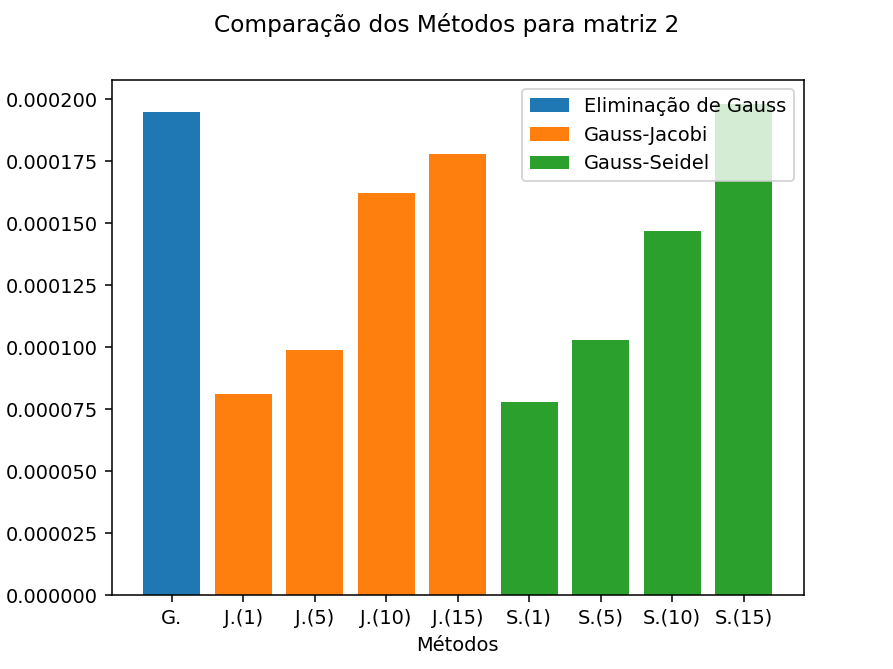

In [17]:
%matplotlib notebook
mtplot.figure(2)
mtplot.suptitle("Comparação dos Métodos para matriz 2")
mtplot.bar(['G.'],tempo2_m1)
mtplot.bar(['J.(1)','J.(5)','J.(10)','J.(15)'],tempo2_m2[0:4])
mtplot.bar(['S.(1)','S.(5)','S.(10)','S.(15)'],tempo2_m3[0:4])
mtplot.ylabel("Tempo(s)")
mtplot.xlabel("Métodos")
mtplot.legend(['Eliminação de Gauss','Gauss-Jacobi','Gauss-Seidel'])
mtplot.show()

#### Resultados das Aproximações

In [59]:
pandas.DataFrame([[resp2_m1,'-','-','-'], resp2_m2, resp2_m3], columns=itr, index=["E.Gauss","Jacobi","Seidel"])

,1,5,10,15
E.Gauss,"[5.489373007438895, -2.1105207226354943, 2.687...",-,-,-
Jacobi,"[5.2390307696812535, -2.034228338747607, 2.687...","[5.4893730074388944, -2.110520722635494, 2.687...","[5.4893730074388944, -2.110520722635494, 2.687...","[5.4893730074388944, -2.110520722635494, 2.687..."
Seidel,"[6.055555555555555, -3.0921052631578947, 2.977...","[5.4893730074388944, -2.110520722635494, 2.687...","[5.4893730074388944, -2.110520722635494, 2.687...","[5.4893730074388944, -2.110520722635494, 2.687..."


#### Erro Absoluto


In [60]:
pandas.DataFrame([[erro_abs2_m1,'-','-','-'], erro_abs2_m2, erro_abs2_m3], columns=itr, index=["E.Gauss","Jacobi","Seidel"])

,1,5,10,15
E.Gauss,"[0.0, 0.0, 0.0, 0.0]",-,-,-
Jacobi,"[2.4056649075945558, 0.6442467972754926, 0.0, ...","[7.105427357601002e-15, 0.0, 0.0, 0.0]","[7.105427357601002e-15, 0.0, 0.0, 0.0]","[7.105427357601002e-15, 0.0, 0.0, 0.0]"
Seidel,"[7.348723072868715, 8.933182917242423, 3.38738...","[7.105427357601002e-15, 0.0, 0.0, 0.0]","[7.105427357601002e-15, 0.0, 0.0, 0.0]","[7.105427357601002e-15, 0.0, 0.0, 0.0]"


#### Tempos

In [20]:
pandas.DataFrame([[tempo2_m1,'-','-','-'], tempo2_m2, tempo2_m3], columns=itr, index=["E.Gauss","Jacobi","Seidel"])

,1,5,10,15
E.Gauss,0.000195,-,-,-
Jacobi,0.000081,9.9e-05,0.000162,0.000178
Seidel,0.000078,0.000103,0.000147,0.000198


Nos testes da segunda matriz, novamente os métodos iterativos levaram metade do tempo em relação ao método da Eliminação de Gauss. Nessa matriz, podemos ver que houve um erro absoluto de $7.10^{-15}$ associado à uma das icógnitas em ambos os métodos iterativos, onde o método de Gauss pode encontrar a solutação com nenhum erro associado. Embora os métodos iterativos não tenham encontrado a solução exata nessa segunda matriz, novamente esses métodos encontraram a solução em menos de 5 iterações.

## 4. Conclusão

Existem erros associados as medições de tempo de associados ao Jupyter Notebook que não interpreta diretamente o código python, onde em outra execução o método da Eliminação de Gauss demorou mais tempo em relação aos outros métodos. No método de Jacobi, um dos laços poderia ser otimizado ao inserir sua função no outro laço já existente, diminuindo um pouco mais o tempo de execução. (Este último foi notado depois de todas execuções) <br>
Outro erro de paralaxe encontra-se nas diferenças dos erros absolutos obtidos nos métodos de Jacobi e Seidel, onde o método de Jacobi demonstrou menor erro absoluto do que o método de Seidel, onde, intuitivamente, deveria ser o contrário, pois o método de Seidel atualiza os valores da solução durante a prória iteração para convergir mais rapidamente na solução. Esse diferença pode ter ocorrido por conta das implementações. <br>
No geral, podemos perceber que os métodos iterativos podem encontrar a solução dos sistemas de equação na metade do tempo do método de Gauss, entretanto, é importante destacar que esses dois métodos iterativos nem sempre podem convergir para a solução do sistema. Esses dois método iterativos possuem critérios de convergia, conhecido como critério das linhas e critério das colunas, onde a matriz de icógnitas deve estar ou pode ser configurada como diagonalmente estritamente dominante. A verificação e ajuste desses critérios aumentam o tempo de execução dos métodos iterativos quando exetados juntos.<br>
Outra diferença entre esses métodos é que o método da Eliminação de Gauss pode não convergir quando a matriz de icógnitas do sistema apresenta várias lacunas com valores nulo, e por sua natureza analítica também não realiza aproximações para esses casos. <br>
Embora em ambas as matrizes o método da Eliminação de Gauss tenha levado mais tempo, nas duas o método convergiu para uma solução exata, onde os outros métodos iterativos tiveram um erro associado ao segundo caso. <br>
Com base nos testes realizados e com as considerações obtidas através dos resultdos resultados e da análise da natureza dos algoritmos, podemos perceber que torna-se imprecisa uma conclusão sobre a efetividade superior de um método ao outro, pois ambos possuem critérios para convergir em uma solução e podem oferer uma vantagem sobre o outro dependendo a configuração da matriz.